In [3]:
from scipy.spatial import distance
import numpy as np
import pandas as pd

## [PART 1]: Read Data

In [2]:
dataset_name = '1063'
timesplit = '1m'
window_len = '60'
step_size = '30'

dataset_folder = f'{dataset_name}_{timesplit}_winlen_{window_len}_stepsize_{step_size}'
dataset_path = f'/home/cc/clio/drift-detection/output/{dataset_folder}/{dataset_folder}.csv'

In [4]:
data = pd.read_csv(dataset_path)
data

,iops_ks_distance,iops_ks_p_val,iops_ks_label,iops_cvm_distance,iops_cvm_p_val,iops_cvm_label,read_write_ratio_ks_distance,read_write_ratio_ks_p_val,read_write_ratio_ks_label,read_write_ratio_cvm_distance,...,write_size_ratio_cvm_p_val,write_size_ratio_cvm_label,bandwidth_ks_distance,bandwidth_ks_p_val,bandwidth_ks_label,bandwidth_cvm_distance,bandwidth_cvm_p_val,bandwidth_cvm_label,start,end
0,0.266667,0.022555,0,0.571389,0.026306,0,0.283333,0.012665,0,0.867778,...,0.025755,0,0.216667,0.102452,0,0.450278,0.053459,0,0,60
1,0.250000,0.038724,0,0.604444,0.021765,0,0.233333,0.064124,0,0.278333,...,0.026677,0,0.250000,0.038724,0,0.780000,0.008114,0,30,90
2,0.166667,0.337101,0,0.300278,0.135652,0,0.133333,0.613069,0,0.093889,...,0.487250,0,0.200000,0.157969,0,0.336111,0.107750,0,60,120
3,0.133333,0.613069,0,0.110278,0.544145,0,0.200000,0.157969,0,0.221389,...,0.449128,0,0.083333,0.974062,2,0.052500,0.872515,0,90,150
4,0.100000,0.896078,0,0.054167,0.862238,0,0.133333,0.613069,0,0.088889,...,0.540373,0,0.116667,0.766017,0,0.064444,0.797527,0,120,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.216667,0.102452,0,0.480000,0.044806,0,0.166667,0.337101,0,0.159722,...,0.944548,0,0.200000,0.157969,0,0.431111,0.059972,0,12630,12690
422,0.183333,0.235031,0,0.212778,0.246118,0,0.116667,0.766017,0,0.047847,...,0.448372,0,0.183333,0.235031,0,0.210000,0.251071,0,12660,12720
423,0.183333,0.235031,0,0.437222,0.057808,0,0.083333,0.974062,2,0.030903,...,0.575410,0,0.200000,0.157969,0,0.438056,0.057519,0,12690,12750
424,0.166667,0.337101,0,0.190556,0.289273,0,0.100000,0.896078,0,0.042014,...,0.779607,0,0.183333,0.235031,0,0.200833,0.268277,0,12720,12780


In [5]:
characteristics_path = f'/home/cc/clio/runs/raw/tencent/characteristic/{dataset_name}/{timesplit}/characteristic.csv'
characteristics = pd.read_csv(characteristics_path)

characteristics

,num_io,start_time,end_time,ts_unit,duration,read_count,write_count,read_ratio,write_ratio,read_write_ratio,...,write_iat_p60,write_iat_p70,write_iat_p75,write_iat_p80,write_iat_p90,write_iat_p95,write_iat_p99,write_iat_p999,write_iat_p9999,write_iat_p100
0,44447,2.016100e+00,5.999894e+04,ms,59996.9210,34562,9885,0.7776,0.2224,3.4964,...,3.729411,4.979147e+00,5.848400e+00,6.968832e+00,1.098852e+01,1.596411e+01,5.030692e+01,7.842878e+02,1.282984e+03,1.282984e+03
1,39680,6.000000e+04,1.200000e+05,ms,59999.9955,30502,9178,0.7687,0.2313,3.3234,...,2.945059,3.725814e+00,4.258084e+00,4.950336e+00,7.663061e+00,1.241583e+01,8.160057e+01,1.343748e+03,2.195862e+03,2.195862e+03
2,54722,1.200000e+05,1.799998e+05,ms,59999.7992,41966,12756,0.7669,0.2331,3.2899,...,2.796691,3.563230e+00,4.093643e+00,4.786423e+00,7.564615e+00,1.211197e+01,4.439708e+01,6.563327e+02,1.569220e+03,1.569220e+03
3,60007,1.800000e+05,2.399997e+05,ms,59999.7043,42857,17150,0.7142,0.2858,2.4990,...,2.620251,3.331978e+00,3.795400e+00,4.382209e+00,6.372092e+00,8.842269e+00,1.951834e+01,2.683413e+02,1.615427e+03,1.615427e+03
4,61624,2.400000e+05,2.999997e+05,ms,59999.6803,45108,16516,0.7320,0.2680,2.7312,...,3.073399,3.934619e+00,4.516861e+00,5.253314e+00,7.810037e+00,1.087408e+01,2.038680e+01,1.308700e+02,7.615399e+02,7.615399e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,12520,7.809600e+08,7.810190e+08,ms,59000.0000,10473,2047,0.8365,0.1635,5.1163,...,3.703440,5.924520e+00,7.978352e+00,1.178055e+01,4.228474e+01,1.423808e+02,1.083190e+03,2.051264e+03,2.082979e+03,2.082979e+03
12890,1008,7.810200e+08,7.810790e+08,ms,59003.7286,874,134,0.8671,0.1329,6.5224,...,280.163417,5.553309e+02,7.391129e+02,9.988252e+02,1.349384e+03,1.828370e+03,1.999763e+03,1.999771e+03,1.999771e+03,1.999776e+03
12891,2777,7.810800e+08,7.811394e+08,ms,59350.9745,2417,360,0.8704,0.1296,6.7139,...,38.923921,8.517947e+01,1.325346e+02,2.182924e+02,6.989813e+02,1.277835e+03,2.050381e+03,2.064848e+03,2.064848e+03,2.064848e+03
12892,35835,7.811400e+08,7.811998e+08,ms,59787.1000,26245,9590,0.7324,0.2676,2.7367,...,3.003849,3.766748e+00,4.260622e+00,4.888941e+00,7.348472e+00,1.204780e+01,8.057535e+01,1.183762e+03,1.835652e+03,1.835652e+03


## [Part 2] Compute Jensen-Shannon Distance

In [22]:
features = ['iops', 'read_write_ratio', 'write_size_ratio', 'bandwidth']

ref_size = 30
step = 15


In [33]:
def get_result(filtered_labels, feature):
    
    js_scores = []
    
    for index, row in filtered_labels.iterrows():
       
        start = row['start']
        end = row['end']
        label = row['label']
        
        row_result = {'label': label, 'start':start, 'end':end}
        
        ref_data = characteristics[feature].iloc[start:start + ref_size]
        start = start + step
        
        count = 0
        while start + ref_size <= end:

            cmp_data = characteristics[feature].iloc[start:start + ref_size]
            js_dist = distance.jensenshannon(ref_data, cmp_data)
            
            row_result[f'{count}'] = js_dist
            
            start += step
            count += 1
            
        js_scores.append(row_result)    
    
    js_score_df = pd.DataFrame(js_scores)
        
    return js_score_df
    

In [34]:
js_distance = {}

for feature in features:
    
    feature_columns = [col for col in data.columns if feature in col and 'label' in col]
    selected_columns = ['start', 'end'] + feature_columns
    selected_labels = data[selected_columns].copy()
    
    selected_labels.loc[:, 'label'] = selected_labels[feature_columns].max(axis=1)
    filtered_labels = selected_labels.loc[selected_labels['label'].isin([1, 2])]

    results = get_result(filtered_labels, feature)
    js_distance[feature] = results
    
    
    

In [35]:
js_distance['iops']

,label,start,end,0,1
0,1,690,750,0.075590,0.150057
1,1,1200,1260,0.088043,0.098112
2,1,1230,1290,0.161280,0.262934
3,1,1740,1800,0.491649,0.497294
4,1,2130,2190,0.177378,0.245560
5,1,2970,3030,0.068684,0.099524
6,2,4080,4140,0.062590,0.069028
7,2,4200,4260,0.072791,0.064459
8,2,4230,4290,0.067342,0.064442
9,2,4290,4350,0.059979,0.074971


## [Part 3] Evaluation

In [51]:
import matplotlib.pyplot as plt

In [60]:
index = 3
feature_name = 'iops'
num_plots = len(js_distance[feature_name].columns) - 3

data_df = js_distance[feature_name]
start = data_df['start'][index]
end = data_df['end'][index]

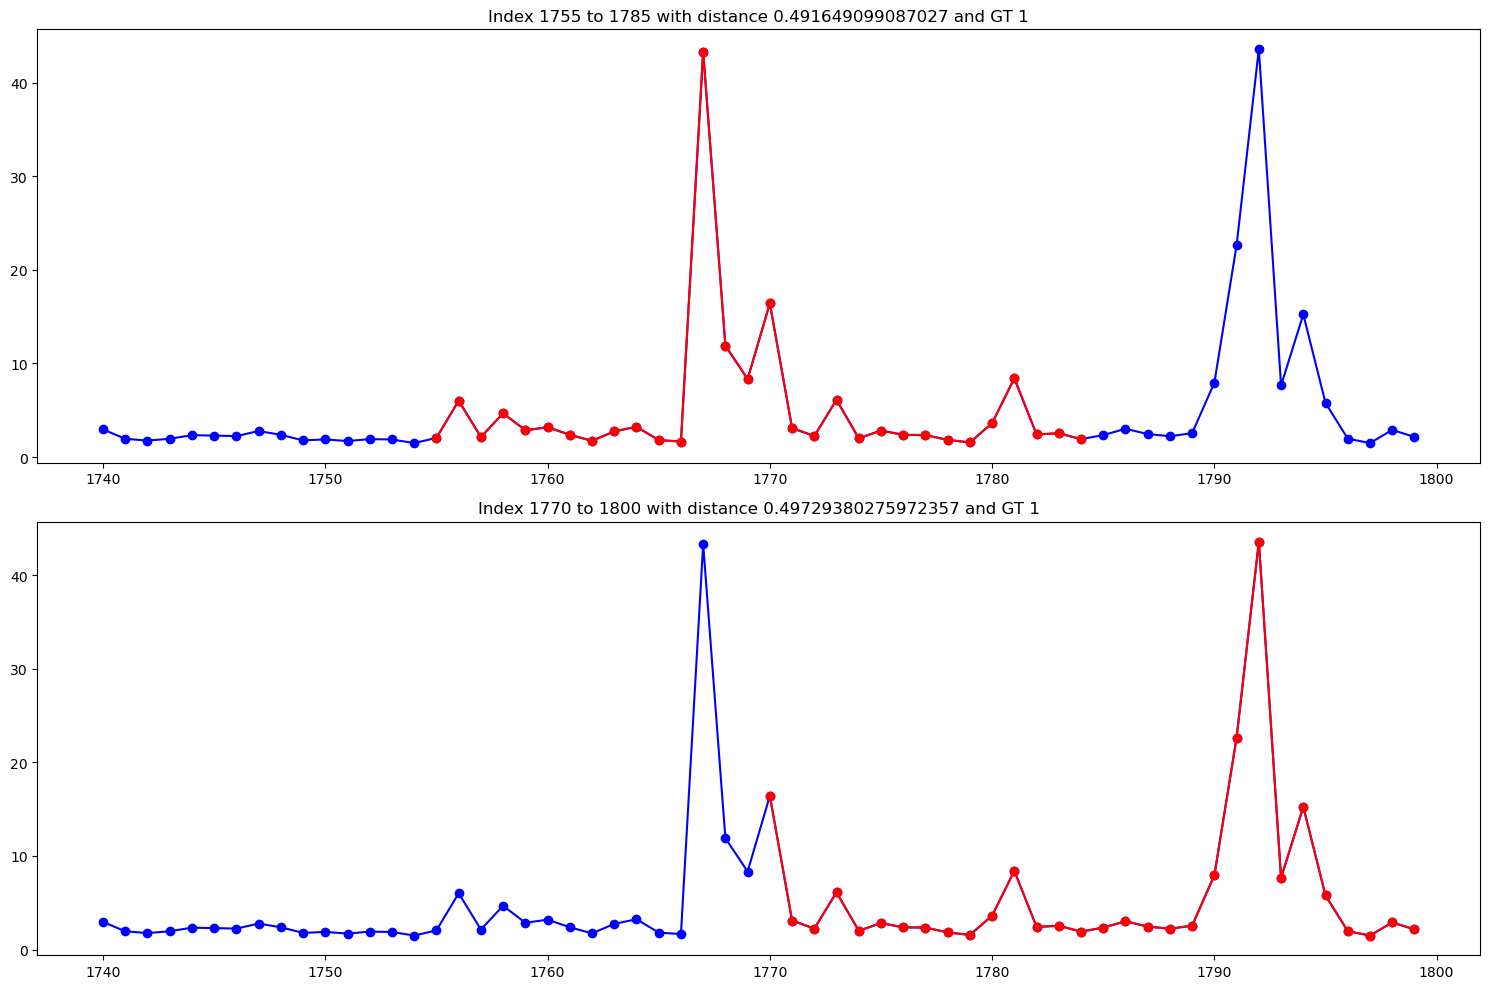

In [61]:
plt.figure(figsize=(15, 5 * num_plots))

for i in range(num_plots):
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(characteristics[feature_name].iloc[start:end], marker='o', linestyle='-', color='b')
    
    cmp_start = (i+1) * step + start
    cmp_end = cmp_start + ref_size
    
    plt.plot(characteristics[feature_name].iloc[cmp_start:cmp_end], marker='o', linestyle='-', color='r')
    
    gt_label = data_df['label'].iloc[index]
    plt.title(f'Index {cmp_start} to {cmp_end} with distance {data_df[str(i)].iloc[index]} and GT {gt_label}')
    
plt.tight_layout()
plt.show()

In [67]:
from sklearn.metrics import accuracy_score, recall_score

threshold = 0.1

In [72]:
eval_results = {}

for feature_name, data_df in js_distance.items():
    
    preds = data_df[['0', '1']].max(axis=1)
    preds_binary = preds > threshold
    
    true_labels = (data_df['label'] == 1)
    
    accuracy = accuracy_score(true_labels, preds_binary)
    recall = recall_score(true_labels, preds_binary, average='macro', zero_division=0)
    
    # Store the results in the dictionary
    eval_results[feature_name] = {
        'accuracy': accuracy,
        'recall': recall
    }
    
    # Optional: Print results for each feature
    print(f"Feature: {feature_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}\n")
    

# Convert the eval_results dictionary to a DataFrame
results_df = pd.DataFrame(eval_results).T

# Compute the average accuracy and recall
average_accuracy = results_df['accuracy'].mean()
average_recall = results_df['recall'].mean()

# Print the averages
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Recall: {average_recall:.4f}")

Feature: iops
Accuracy: 0.7273
Recall: 0.7278

Feature: read_write_ratio
Accuracy: 0.4348
Recall: 0.5000

Feature: write_size_ratio
Accuracy: 0.5417
Recall: 0.5417

Feature: bandwidth
Accuracy: 0.5667
Recall: 0.5491

Average Accuracy: 0.5676
Average Recall: 0.5796


/tmp/ipykernel_119592/3582877844.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='accuracy', data=results_df, palette='viridis')
/tmp/ipykernel_119592/3582877844.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='recall', data=results_df, palette='viridis')


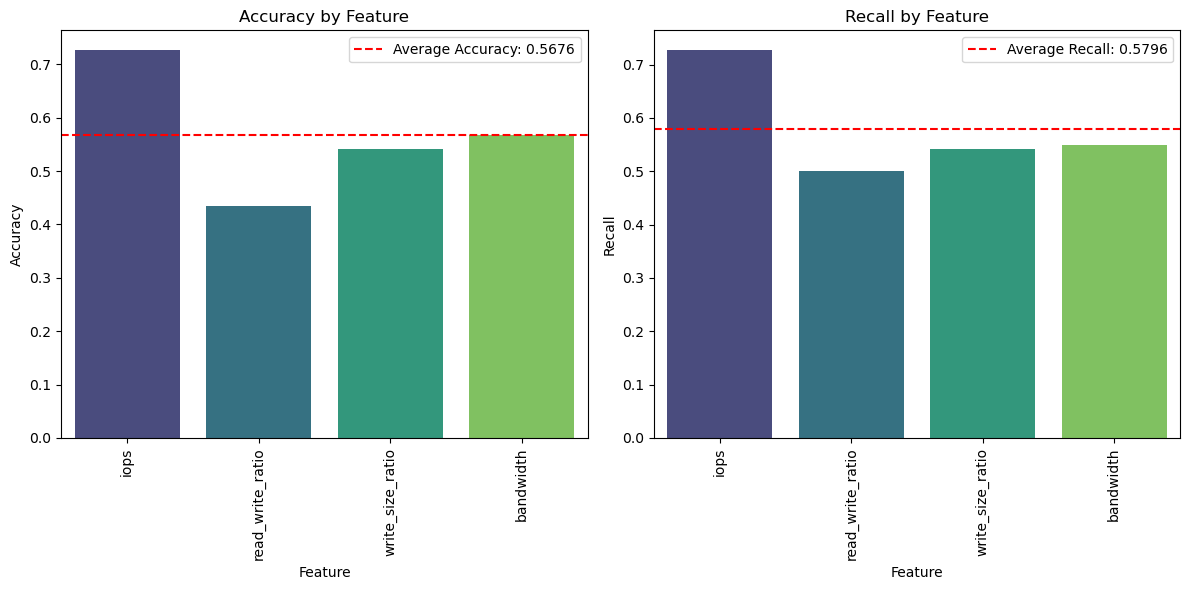

In [75]:
import seaborn as sns

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y='accuracy', data=results_df, palette='viridis')
plt.axhline(y=average_accuracy, color='red', linestyle='--', label=f'Average Accuracy: {average_accuracy:.4f}')
plt.title('Accuracy by Feature')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()

# Plot recall
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y='recall', data=results_df, palette='viridis')
plt.axhline(y=average_recall, color='red', linestyle='--', label=f'Average Recall: {average_recall:.4f}')
plt.title('Recall by Feature')
plt.xlabel('Feature')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()